# TASK # 
Submission date: 25-08-2024

Topic: Coffee Shop Sales

Objective: Clean and analyze the provided dataset to determine the profitability of products/services.
- Identify strategies to increase profit margins or mitigate losses based on the analysis. 

Step 1: Load and Clean the Data

In [15]:
import numpy as np
import pandas as pd

In [16]:
# Load the Excel file
file_path = r'D:\Data_science_Projects\Task-2\Coffee Shop Sales.xlsx'
xls = pd.ExcelFile(file_path)



In [17]:
# Load all sheets into dataframes
transactions_df = pd.read_excel(xls, 'Transactions')
sheet1_df = pd.read_excel(xls, 'Sheet1')
sheet6_df = pd.read_excel(xls, 'Sheet6')

# Combine Sheet1 and Sheet6 to get a complete list of product prices
product_prices_df = pd.concat([sheet1_df, sheet6_df]).drop_duplicates().reset_index(drop=True)

# Check for missing values and duplicates
print("Missing values in Transactions:", transactions_df.isnull().sum())
print("Duplicates in Transactions:", transactions_df.duplicated().sum())
print("Missing values in Product Prices:", product_prices_df.isnull().sum())
print("Duplicates in Product Prices:", product_prices_df.duplicated().sum())

Missing values in Transactions: transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64
Duplicates in Transactions: 0
Missing values in Product Prices: product_id    2
unit_price    1
dtype: int64
Duplicates in Product Prices: 0


Step 2: Merge Data and Perform Profit/Loss Analysis

In [19]:
# Merge Transactions with the combined product prices
merged_df = pd.merge(transactions_df, product_prices_df, on='product_id', how='left', suffixes=('', '_price_sheet'))

# Calculate Revenue, Cost, and Profit/Loss for each transaction
merged_df['Revenue'] = merged_df['transaction_qty'] * merged_df['unit_price']
merged_df['Cost'] = merged_df['transaction_qty'] * merged_df['unit_price_price_sheet']
merged_df['Profit/Loss'] = merged_df['Revenue'] - merged_df['Cost']

# Group by product to analyze total sales, cost, and profit/loss
product_analysis = merged_df.groupby('product_id').agg({
    'Revenue': 'sum',
    'Cost': 'sum',
    'Profit/Loss': 'sum'
}).reset_index()

# Display the product analysis
print(product_analysis.head())


   product_id  Revenue     Cost  Profit/Loss
0           1  3852.00  3852.00          0.0
1           2  3294.00  3294.00          0.0
2           3  2492.75  2492.75          0.0
3           4  3067.50  3067.50          0.0
4           5  2220.00  2220.00          0.0


Step 3: Visualize the Results

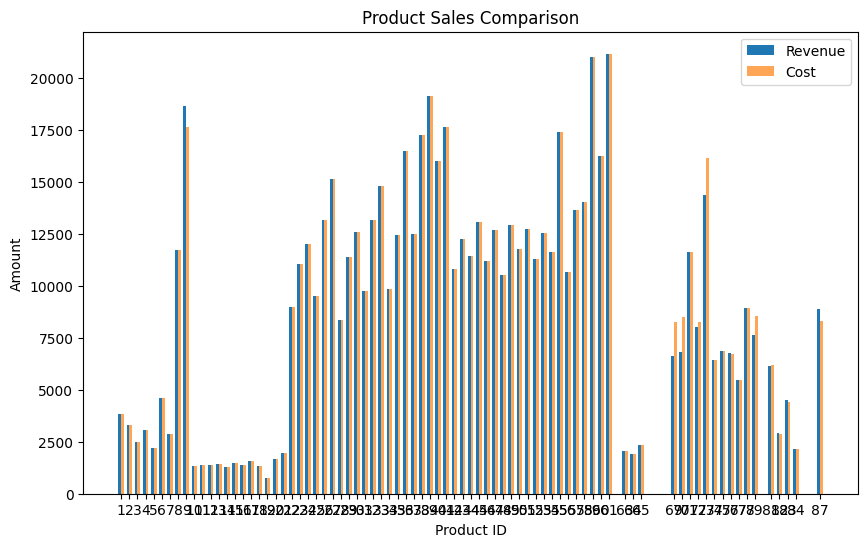

Products generating profit:
    product_id   Revenue     Cost  Profit/Loss
8            9  18630.00  17613.0      1017.00
66          71  11625.98  11610.0        15.98
69          74   6436.56   6426.0        10.56
70          75   6861.88   6839.0        22.88
71          76   6748.96   6734.0        14.96
73          78   8949.45   8932.5        16.95
76          82   2935.00   2880.0        55.00
77          83   4509.00   4410.0        99.00
79          87   8902.20   8318.1       584.10
Products incurring losses:
    product_id   Revenue      Cost  Profit/Loss
0            1   3852.00   3852.00         0.00
1            2   3294.00   3294.00         0.00
2            3   2492.75   2492.75         0.00
3            4   3067.50   3067.50         0.00
4            5   2220.00   2220.00         0.00
..         ...       ...       ...          ...
68          73  14336.26  16128.84     -1792.58
72          77   5460.00   5460.00         0.00
74          79   7626.62   8558.16      -93

In [21]:
import matplotlib.pyplot as plt

# Plot sales comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = product_analysis['product_id']
revenue_bar = plt.bar(index, product_analysis['Revenue'], bar_width, label='Revenue')
cost_bar = plt.bar(index + bar_width, product_analysis['Cost'], bar_width, label='Cost', alpha=0.7)

plt.xlabel('Product ID')
plt.ylabel('Amount')
plt.title('Product Sales Comparison')
plt.xticks(index + bar_width / 2, product_analysis['product_id'])
plt.legend()

plt.show()

# Identify products generating profit and those incurring losses
profit_products = product_analysis[product_analysis['Profit/Loss'] > 0]
loss_products = product_analysis[product_analysis['Profit/Loss'] <= 0]

print("Products generating profit:")
print(profit_products)

print("Products incurring losses:")
print(loss_products)


Step 4: Predictive Modeling (Optional)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection
features = merged_df[['transaction_qty', 'unit_price']]
target = merged_df['Profit/Loss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future profits
y_pred = model.predict(X_test)

# Calculate and print the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Recommendations for increasing profit
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print("Factors contributing to profitability:")
print(coefficients)

if coefficients['Coefficient']['unit_price'] > 0:
    print("Recommendation: Increase unit price to boost profits.")


Mean Squared Error: 0.3062016211162149
Factors contributing to profitability:
                 Coefficient
transaction_qty     0.066303
unit_price          0.023239
Recommendation: Increase unit price to boost profits.


Step 5: Loss Mitigation Strategies

In [25]:
# Analyze factors contributing to losses
loss_factors = merged_df[merged_df['Profit/Loss'] <= 0]

# Example: Analyze the impact of high costs on losses
high_costs = loss_factors[loss_factors['Cost'] > merged_df['Cost'].mean()]

print("Factors contributing to losses:")
print(high_costs.describe())

# Strategies to minimize losses
print("Strategies to minimize losses:")
print("1. Optimize supply chain to reduce costs.")
print("2. Negotiate better deals with suppliers.")
print("3. Implement cost control measures.")

# Actionable steps to convert loss-making products into profitable ones
print("Actionable steps:")
print("1. Increase the price of loss-making products.")
print("2. Reduce production costs through efficient resource management.")
print("3. Enhance marketing efforts to boost sales.")


Factors contributing to losses:
       transaction_id               transaction_date  transaction_qty  \
count    56690.000000                          56690     56690.000000   
mean     74932.913247  2023-04-15 17:03:25.115540480         1.976292   
min          1.000000            2023-01-01 00:00:00         1.000000   
25%      37294.500000            2023-03-06 00:00:00         2.000000   
50%      75095.000000            2023-04-24 00:00:00         2.000000   
75%     112300.750000            2023-05-30 00:00:00         2.000000   
max     149453.000000            2023-06-30 00:00:00         8.000000   
std      43200.163042                            NaN         0.376461   

           store_id    product_id    unit_price  unit_price_price_sheet  \
count  56690.000000  56690.000000  56690.000000            56690.000000   
mean       5.335315     41.841912      4.203332                4.231286   
min        3.000000      1.000000      2.000000                2.000000   
25%       

Step 6: Save and Document the Results

In [26]:
# Save the cleaned dataset
cleaned_file_path = 'cleaned_coffee_shop_sales.xlsx'
merged_df.to_excel(cleaned_file_path, index=False)

# Document the cleaning process
with open('cleaning_process.txt', 'w') as file:
    file.write("Data Cleaning Steps:\n")
    file.write("1. Loaded transaction data and product prices from multiple sheets.\n")
    file.write("2. Merged datasets on product_id.\n")
    file.write("3. Calculated Revenue, Cost, and Profit/Loss for each transaction.\n")


Step 7: Create a Presentation (Optional)

In [29]:
pip install python-pptx


   ---------------------------------------- 0.0/472.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.8 kB ? eta -:--:--
    --------------------------------------- 10.2/472.8 kB ? eta -:--:--
    --------------------------------------- 10.2/472.8 kB ? eta -:--:--
   -- ------------------------------------ 30.7/472.8 kB 262.6 kB/s eta 0:00:02
   -- ------------------------------------ 30.7/472.8 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 92.2/472.8 kB 403.5 kB/s eta 0:00:01
   ----------- -------------------------- 143.4/472.8 kB 568.9 kB/s eta 0:00:01
   -------------- ----------------------- 184.3/472.8 kB 619.5 kB/s eta 0:00:01
   ---------------- --------------------- 204.8/472.8 kB 593.2 kB/s eta 0:00:01
   ---------------- --------------------- 204.8/472.8 kB 593.2 kB/s eta 0:00:01
   ------------------------- ------------ 317.4/472.8 kB 756.6 kB/s eta 0:00:01
   --------------------------- ---------- 348.2/472.8 kB 746.0 kB/s eta 0:

In [30]:
from pptx import Presentation
from pptx.util import Inches

# Create a PowerPoint presentation
prs = Presentation()

# Add a title slide
slide = prs.slides.add_slide(prs.slide_layouts[0])
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Coffee Shop Sales Analysis"
subtitle.text = "Profit/Loss Analysis and Recommendations"

# Add a slide for profit/loss analysis
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Profit/Loss Analysis"

content = slide.placeholders[1]
content.text = f"Products generating profit:\n{profit_products}\n\nProducts incurring losses:\n{loss_products}"

# Add a slide for predictive modeling results
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Predictive Modeling Results"

content = slide.placeholders[1]
content.text = f"Mean Squared Error: {mse}\nFactors contributing to profitability:\n{coefficients}"

# Add a slide for loss mitigation strategies
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Loss Mitigation Strategies"

content = slide.placeholders[1]
content.text = "1. Optimize supply chain to reduce costs.\n2. Negotiate better deals with suppliers.\n3. Implement cost control measures."

# Add a slide for actionable steps
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Actionable Steps"

content = slide.placeholders[1]
content.text = "1. Increase the price of loss-making products.\n2. Reduce production costs through efficient resource management.\n3. Enhance marketing efforts to boost sales."

# Save the presentation
presentation_file_path = 'coffee_shop_sales_presentation.pptx'
prs.save(presentation_file_path)
